In [1]:
# imports

import pandas as pd
import folium
import matplotlib.pyplot as plt

In [2]:
# load dataset

df = pd.read_csv('../data/property_violations.csv')

print(df.columns)

for col in df.columns:
    tot = len(df[col])
    num_na = len(df[col]) - df[col].count()
    print(f"There are {num_na} NaN entries ({num_na/tot * 100}%) in {col}.")

Index(['case_no', 'status_dttm', 'status', 'code', 'value', 'description',
       'violation_stno', 'violation_sthigh', 'violation_street',
       'violation_suffix', 'violation_city', 'violation_state',
       'violation_zip', 'ward', 'contact_addr1', 'contact_addr2',
       'contact_city', 'contact_state', 'contact_zip', 'sam_id', 'latitude',
       'longitude', 'location'],
      dtype='object')
There are 0 NaN entries (0.0%) in case_no.
There are 0 NaN entries (0.0%) in status_dttm.
There are 0 NaN entries (0.0%) in status.
There are 0 NaN entries (0.0%) in code.
There are 21707 NaN entries (100.0%) in value.
There are 223 NaN entries (1.0273183765605565%) in description.
There are 0 NaN entries (0.0%) in violation_stno.
There are 16761 NaN entries (77.21472336112775%) in violation_sthigh.
There are 0 NaN entries (0.0%) in violation_street.
There are 159 NaN entries (0.7324826092965403%) in violation_suffix.
There are 1 NaN entries (0.0046068088635002535%) in violation_city.
There 

In [36]:
# unique properties

unique = df.groupby('location').count()

print("There are", len(unique), "properties.")

There are 11024 properties.


In [3]:
# top offending properties

location_groups = df.groupby(df['location'])
top_locations = list((location_groups.count().nlargest(100, 'case_no')).index)
top_locations = df.loc[df['location'].apply(lambda x: x in top_locations)]

# plot the map using latitude and longitude
map = folium.Map(location=[top_locations.iloc[0].latitude, top_locations.iloc[0].longitude])
for i in range(0,len(top_locations)):
   folium.CircleMarker(
      location=[top_locations.iloc[i]['latitude'], top_locations.iloc[i]['longitude']], radius=5,
      color = 'red'
   ).add_to(map)
map


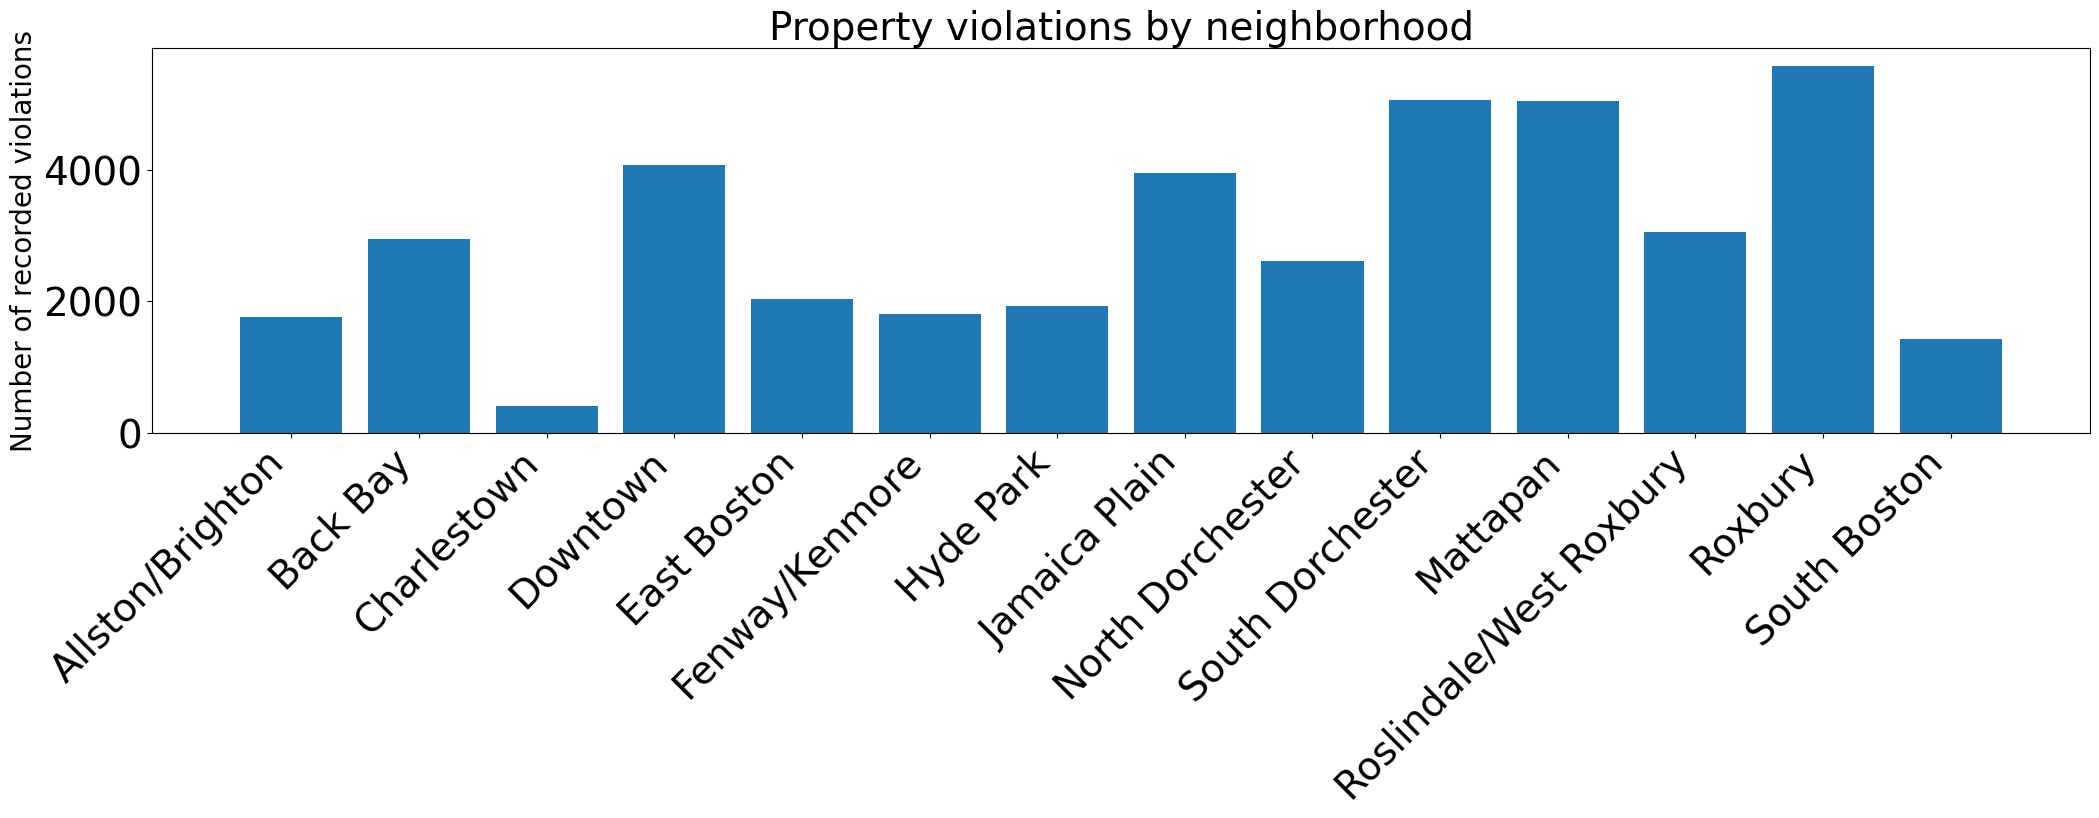

In [5]:
# plot neighborhoods

neigh_bins = {'Allston/Brighton': 0, 'Back Bay': 0, 'Charlestown': 0, 'Downtown': 0, 'East Boston': 0, 'Fenway/Kenmore': 0, 'Hyde Park': 0, 'Jamaica Plain': 0, 'North Dorchester': 0, 'South Dorchester': 0, 'Mattapan': 0, 'Roslindale/West Roxbury': 0, 'Roxbury': 0, 'South Boston': 0}

# convert ward to neighborhood
def ward_to_neighb_generator(nb_structure):

    def fun(string):
        try:
            int(string)
        except ValueError:
            return
        num = int(string)
        if num == 1:
            neighs = ['East Boston']
        elif num == 2:
            neighs = ['Charlestown']
        elif num == 3:
            neighs = ['Back Bay', 'Downtown']
        elif num == 4:
            neighs = ['Back Bay', 'Downtown', 'Jamaica Plain']
        elif num == 5:
            neighs = ['Back Bay', 'Downtown', 'Fenway/Kenmore']
        elif num == 6 or num == 7:
            neighs = ['South Boston']
        elif num == 8:
            neighs = ['Downtown', 'North Dorchester', 'Roxbury']
        elif num == 9:
            neighs = ['Downtown']
        elif num == 10:
            neighs = ['Fenway/Kenmore', 'Jamaica Plain']
        elif num == 11:
            neighs = ['Jamaica Plain']
        elif num == 12:
            neighs = ['Jamaica Plain', 'Roxbury']
        elif num == 13:
            neighs = ['North Dorchester']
        elif num == 14 or num == 17:
            neighs = ['South Dorchester', 'Mattapan', 'Roxbury']
        elif num == 15:
            neighs = ['North Dorchester', 'South Dorchester']
        elif num == 16:
            neighs = ['South Dorchester']
        elif num == 18:
            neighs = ['Hyde Park', 'Mattapan', 'Roslindale/West Roxbury']
        elif num == 19:
            neighs = ['Jamaica Plain', 'Roslindale/West Roxbury']
        elif num == 20:
            neighs = ['Roslindale/West Roxbury']
        elif num == 21 or num == 22:
            neighs = ['Allston/Brighton']
        else:
            neighs = []
        for entry in neighs:
            nb_structure[entry] += 1
    
    return fun


df['ward'].apply(ward_to_neighb_generator(neigh_bins))

fig, ax = plt.subplots(figsize=(25, 5))

ax.bar(neigh_bins.keys(), neigh_bins.values())
ax.set_ylabel("Number of recorded violations")
ax.set_title("Property violations by neighborhood")

plt.xticks(rotation=45, ha="right")
plt.rc('font', size=28)
plt.rc('axes', labelsize=20) 
plt.rc('axes', titlesize=28)
plt.rc('xtick', labelsize=28)

plt.show()

In [7]:
# attempt to merge property violations with main dataset

def gen_comparable_loc(loc: str):
    if (loc[:6] == '(pd.NA'):
        return ""
    loc_t = eval(loc)
    res = str((round(loc_t[0], 5), round(loc_t[1], 5)))
    return res

df_main = pd.read_csv('../data/main_dataset_trimmed_geocoded.csv', dtype={'ZIPCODE':str})

df_main['loc_c'] = df_main['location'].apply(gen_comparable_loc)
df['loc_c'] = df['location'].apply(gen_comparable_loc)

merged = df.set_index('loc_c').join(df_main.set_index('loc_c'), lsuffix='_main', rsuffix='_pv', how='inner')
print(merged.shape)
print(merged.columns)

merged.to_csv('../data/extension_merged.csv')


/var/folders/yg/zpnh1p_d4qvg_bz_487cbyp00000gn/T/ipykernel_1193/1555142623.py:10: DtypeWarning: Columns (37,57) have mixed types. Specify dtype option on import or set low_memory=False.
  df_main = pd.read_csv('../data/main_dataset_trimmed_geocoded.csv', dtype={'ZIPCODE':str})


(296, 90)
Index(['case_no', 'status_dttm', 'status', 'code', 'value', 'description',
       'violation_stno', 'violation_sthigh', 'violation_street',
       'violation_suffix', 'violation_city', 'violation_state',
       'violation_zip', 'ward', 'contact_addr1', 'contact_addr2',
       'contact_city', 'contact_state', 'contact_zip', 'sam_id', 'latitude',
       'longitude', 'location_main', 'Unnamed: 0.1', 'Unnamed: 0', 'PID',
       'CM_ID', 'GIS_ID', 'ST_NUM', 'ST_NAME', 'UNIT_NUM', 'CITY', 'ZIPCODE',
       'BLDG_SEQ', 'NUM_BLDGS', 'LUC', 'LU', 'LU_DESC', 'BLDG_TYPE', 'OWN_OCC',
       'OWNER', 'MAIL_ADDRESSEE', 'MAIL_ADDRESS', 'MAIL_CITY', 'MAIL_STATE',
       'MAIL_ZIPCODE', 'RES_FLOOR', 'CD_FLOOR', 'RES_UNITS', 'COM_UNITS',
       'RC_UNITS', 'LAND_SF', 'GROSS_AREA', 'LIVING_AREA', 'LAND_VALUE',
       'BLDG_VALUE', 'TOTAL_VALUE', 'GROSS_TAX', 'YR_BUILT', 'YR_REMODEL',
       'STRUCTURE_CLASS', 'ROOF_STRUCTURE', 'ROOF_COVER', 'INT_WALL',
       'EXT_FINISHED', 'INT_COND', 'EXT_CO

In [8]:
# plot the map using latitude and longitude
map = folium.Map(location=[merged.iloc[0].latitude, merged.iloc[0].longitude])
for i in range(0,len(merged)):
   folium.CircleMarker(
      location=[merged.iloc[i]['latitude'], merged.iloc[i]['longitude']], radius=5,
      color = 'red'
   ).add_to(map)
map

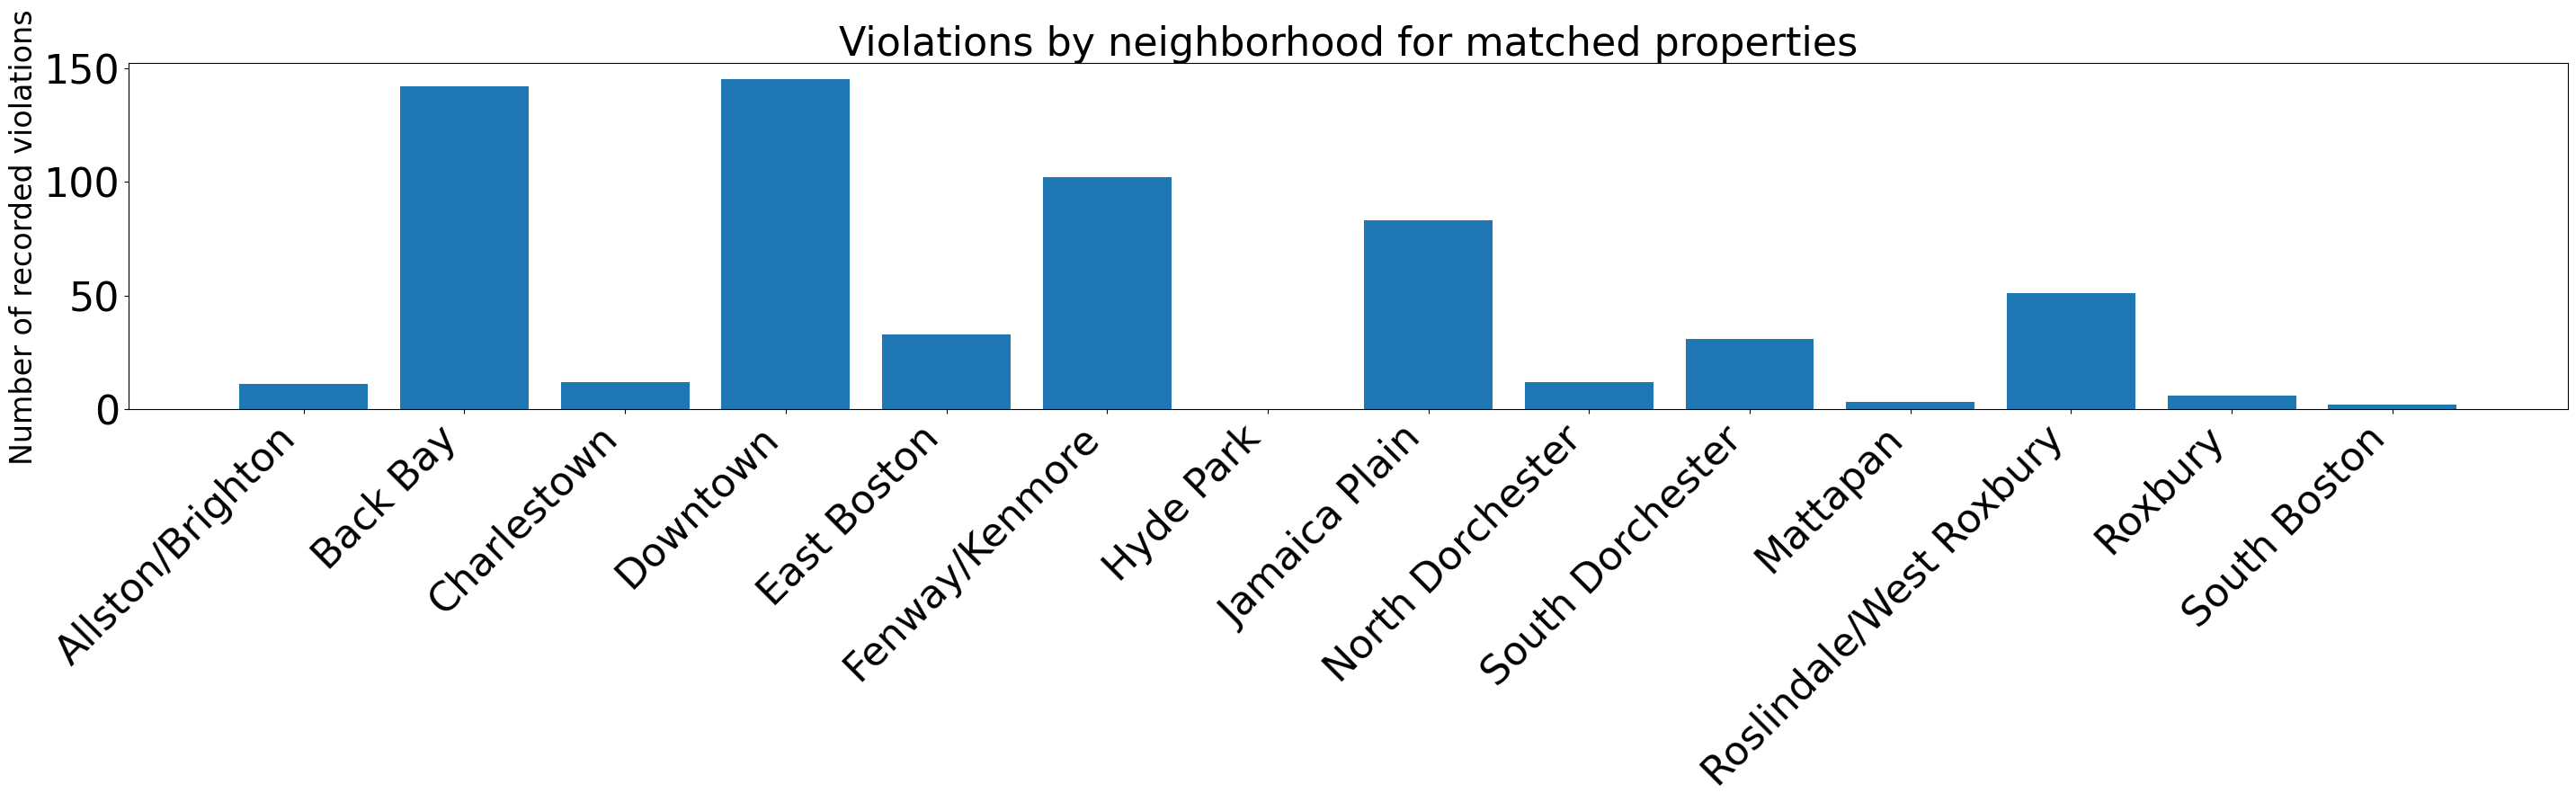

In [18]:
neigh_bins2 = {'Allston/Brighton': 0, 'Back Bay': 0, 'Charlestown': 0, 'Downtown': 0, 'East Boston': 0, 'Fenway/Kenmore': 0, 'Hyde Park': 0, 'Jamaica Plain': 0, 'North Dorchester': 0, 'South Dorchester': 0, 'Mattapan': 0, 'Roslindale/West Roxbury': 0, 'Roxbury': 0, 'South Boston': 0}

fig, ax = plt.subplots(figsize=(35, 5))

merged['ward'].apply(ward_to_neighb_generator(neigh_bins2))
        
ax.bar(neigh_bins2.keys(), neigh_bins2.values())
ax.set_ylabel("Number of recorded violations")
ax.set_title("Violations by neighborhood for matched properties")

plt.xticks(rotation=45, ha="right")
plt.rc('font', size=32)
plt.rc('axes', labelsize=28) 
plt.rc('axes', titlesize=32)
plt.rc('xtick', labelsize=32)
plt.show()

In [49]:
# heatmap
from folium.plugins import HeatMap

map = folium.Map(location=[df.iloc[0].latitude, df.iloc[0].longitude])
HeatMap(df[['latitude', 'longitude']].to_numpy(), radius=15).add_to(map)
map

In [51]:
# heatmap
from folium.plugins import HeatMap

map = folium.Map(location=[merged.iloc[0].latitude, merged.iloc[0].longitude])
HeatMap(merged[['latitude', 'longitude']].to_numpy(), radius=25).add_to(map)
map